In [7]:
import pandas as pd
import numpy as np

def preprocess_flight_data(csv_path):
    df = pd.read_csv("Downloads\Flight_Price.csv")

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Convert date/time columns
    df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.day
    df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.month
    df.drop('Date_of_Journey', axis=1, inplace=True)

    df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
    df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
    df.drop('Dep_Time', axis=1, inplace=True)

    df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
    df.drop('Arrival_Time', axis=1, inplace=True)

    # Duration conversion
    df['Duration'] = df['Duration'].str.replace('h', ' hours').str.replace('m', ' minutes')
    df['Duration'] = df['Duration'].apply(lambda x: '0 hours ' + x if 'hours' not in x else x)
    df['Duration'] = df['Duration'].apply(lambda x: x + ' 0 minutes' if 'minutes' not in x else x)

    df['Duration_hours'] = df['Duration'].apply(lambda x: int(x.split(' ')[0]))
    df['Duration_minutes'] = df['Duration'].apply(lambda x: int(x.split(' ')[2]))
    df.drop('Duration', axis=1, inplace=True)

    # Categorical encoding
    df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True)
    df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2,
                                               '3 stops': 3, '4 stops': 4}).astype(int)
    df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

    return df

df_processed = preprocess_flight_data("Downloads\Flight_Price.csv")

# Step 3: Save the processed data to a new CSV file
df_processed.to_csv("processed_flight_data.csv", index=False)

print("✅ Data preprocessing completed.")
print("📝 Processed file saved as: processed_flight_data.csv")

<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:40: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:40: SyntaxWarning: invalid escape sequence '\F'
C:\Users\ratnakar\AppData\Local\Temp\ipykernel_26812\3889280724.py:5: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv("Downloads\Flight_Price.csv")
C:\Users\ratnakar\AppData\Local\Temp\ipykernel_26812\3889280724.py:40: SyntaxWarning: invalid escape sequence '\F'
  df_processed = preprocess_flight_data("Downloads\Flight_Price.csv")
C:\Users\ratnakar\AppData\Local\Temp\ipykernel_26812\3889280724.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\ratnakar\AppData\Local\Temp\ipykernel_26812\3889280724.py:16: UserWarning: Could not infer format, so each element will be parse

✅ Data preprocessing completed.
📝 Processed file saved as: processed_flight_data.csv


In [9]:
import pandas as pd

# Load the processed file
df_processed = pd.read_csv("processed_flight_data.csv")

# Display the first 10 rows
print(df_processed.head(10))

   Total_Stops  Price  Journey_Day  Journey_Month  Dep_Hour  Dep_Minute  \
0            0   3897           24              3        22          20   
1            2   7662            1              5         5          50   
2            2  13882            9              6         9          25   
3            1   6218           12              5        18           5   
4            1  13302            1              3        16          50   
5            0   3873           24              6         9           0   
6            1  11087           12              3        18          55   
7            1  22270            1              3         8           0   
8            1  11087           12              3         8          55   
9            1   8625           27              5        11          25   

   Arrival_Hour  Arrival_Minute  Duration_hours  Duration_minutes  ...  \
0             1              10               2                50  ...   
1            13           

🔍 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_Day                                10682 non-null  int64
 3   Journey_Month                              10682 non-null  int64
 4   Dep_Hour                                   10682 non-null  int64
 5   Dep_Minute                                 10682 non-null  int64
 6   Arrival_Hour                               10682 non-null  int64
 7   Arrival_Minute                             10682 non-null  int64
 8   Duration_hours                             10682 non-null  int64
 9   Duration_minutes                           10682 non-null  int64
 10  Airline_Air India               

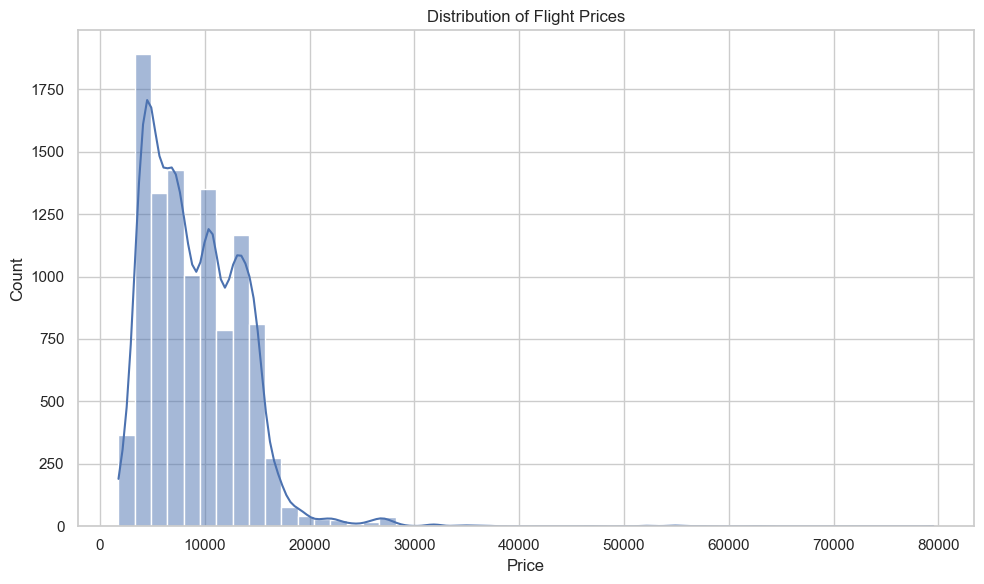

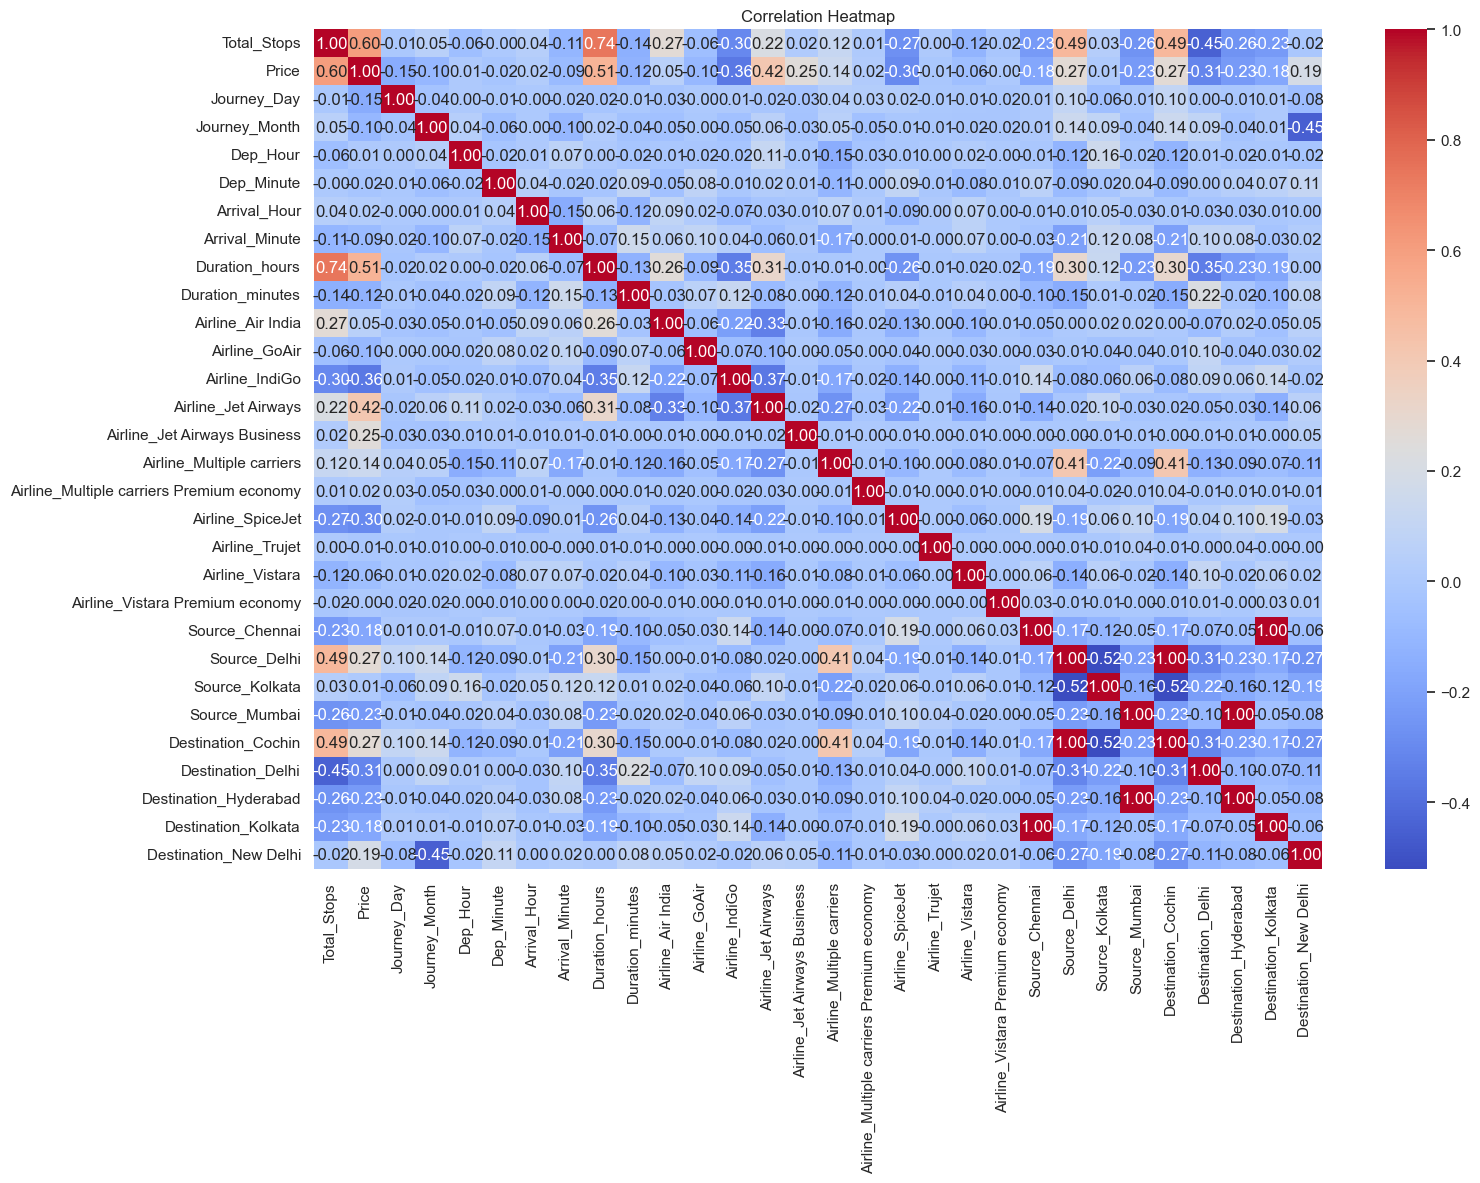

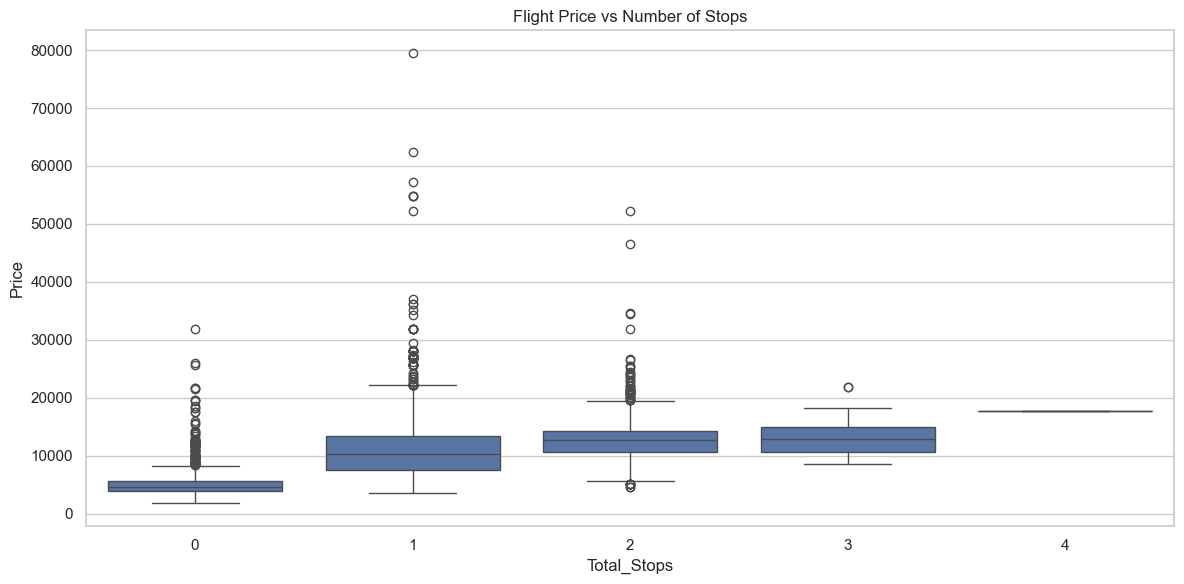

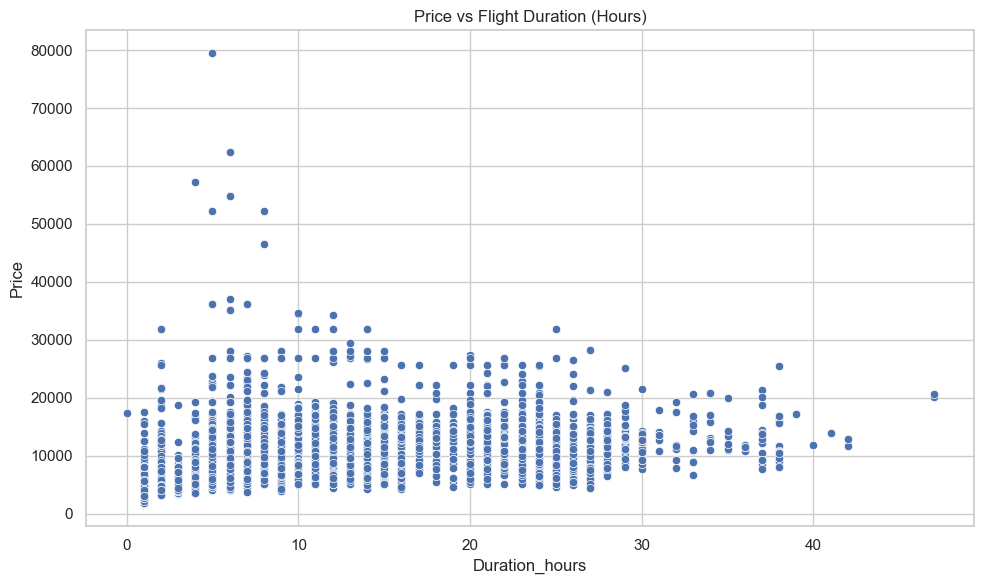

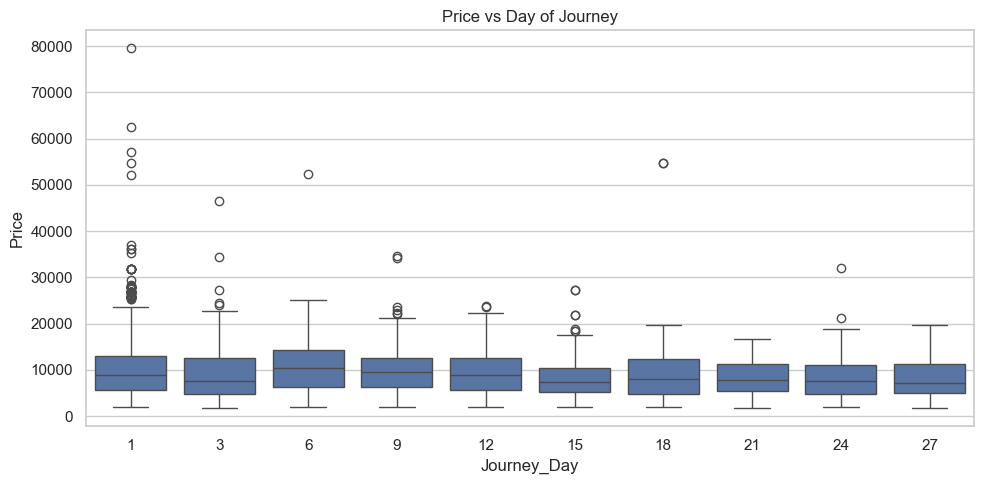

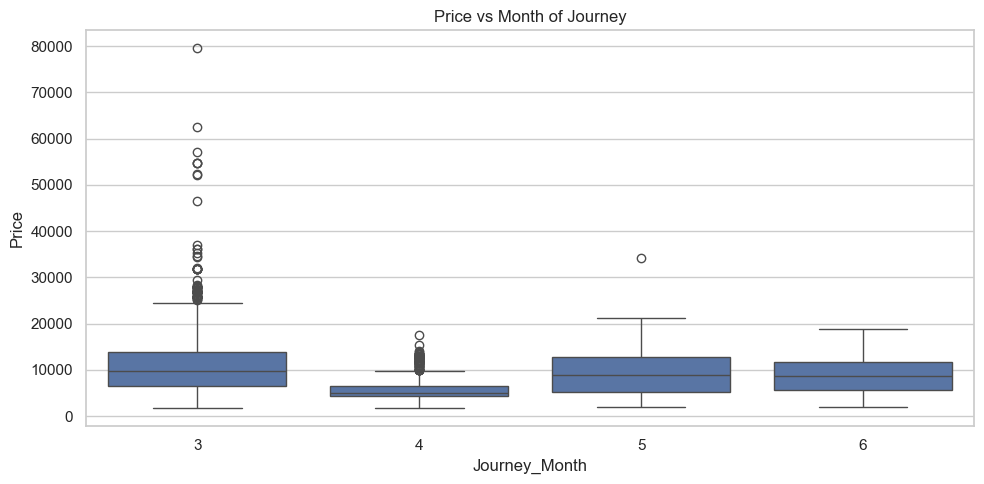

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
df = pd.read_csv("processed_flight_data.csv")

# Set Seaborn style
sns.set(style="whitegrid")

# -------------------------
# 1. Basic Info
# -------------------------
print("🔍 Basic Info:")
print(df.info())
print("\n🧹 Missing Values:")
print(df.isnull().sum())

# -------------------------
# 2. Price Distribution
# -------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -------------------------
# 3. Correlation Heatmap
# -------------------------
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# -------------------------
# 4. Boxplots for Categorical Variables
# -------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title("Flight Price vs Number of Stops")
plt.tight_layout()
plt.show()

if 'Airline' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='Airline', y='Price', data=df)
    plt.title("Flight Price by Airline")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------
# 5. Average Price by Route and Time
# -------------------------
if 'Source' in df.columns and 'Destination' in df.columns:
    route_avg = df.groupby(['Source', 'Destination'])['Price'].mean().reset_index()
    print("\n📍 Average Price by Route:")
    print(route_avg.sort_values(by='Price', ascending=False).head(10))

# -------------------------
# 6. Flight Duration vs Price
# -------------------------
if 'Duration_hours' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Duration_hours', y='Price', data=df)
    plt.title("Price vs Flight Duration (Hours)")
    plt.tight_layout()
    plt.show()

# -------------------------
# 7. Journey Day/Month Effects
# -------------------------
if 'Journey_Day' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Journey_Day', y='Price', data=df)
    plt.title("Price vs Day of Journey")
    plt.tight_layout()
    plt.show()

if 'Journey_Month' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Journey_Month', y='Price', data=df)
    plt.title("Price vs Month of Journey")
    plt.tight_layout()
    plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import mlflow
import mlflow.sklearn
import joblib

# Load processed data
df = pd.read_csv("processed_flight_data.csv")

# --------------------------
# 1. Prepare features & target
# --------------------------
X = df.drop('Price', axis=1)
y = df['Price']

# --------------------------
# 2. Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 3. Initialize models
# --------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# --------------------------
# 4. MLflow setup
# --------------------------
mlflow.set_experiment("Flight_Price_Prediction")

# --------------------------
# 5. Train and evaluate models
# --------------------------
best_model = None
best_rmse = float('inf')

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        print(f"\n🔧 Training {name}...")
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        rmse = mean_squared_error(y_test, preds, squared=False)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        print(f"📊 {name} Performance:")
        print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

        # Log metrics to MLflow
        mlflow.log_param("model", name)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)

        # Log model artifact
        mlflow.sklearn.log_model(model, name.replace(" ", "_") + "_model")

        # Save best model locally
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            joblib.dump(model, "best_flight_price_model.pkl")
            print("✅ Best model updated!")

print("\n🎉 Model training complete!")

2025/04/16 18:21:05 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'square


🔧 Training Linear Regression...
📊 Linear Regression Performance:
RMSE: 2863.97, MAE: 1972.94, R²: 0.62


2025/04/16 18:21:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Best model updated!

🔧 Training Random Forest...


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


📊 Random Forest Performance:
RMSE: 2089.37, MAE: 1176.17, R²: 0.80


2025/04/16 18:21:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Best model updated!

🔧 Training XGBoost...


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


📊 XGBoost Performance:
RMSE: 1861.63, MAE: 1243.15, R²: 0.84


2025/04/16 18:21:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Best model updated!

🎉 Model training complete!


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



📋 Model Comparison:
                          RMSE          MAE  R2 Score
Linear Regression  2863.970593  1972.937286  0.619594
Random Forest      2089.372803  1176.167913  0.797539
XGBoost            1861.627873  1243.151348   0.83927


<Figure size 1200x600 with 0 Axes>

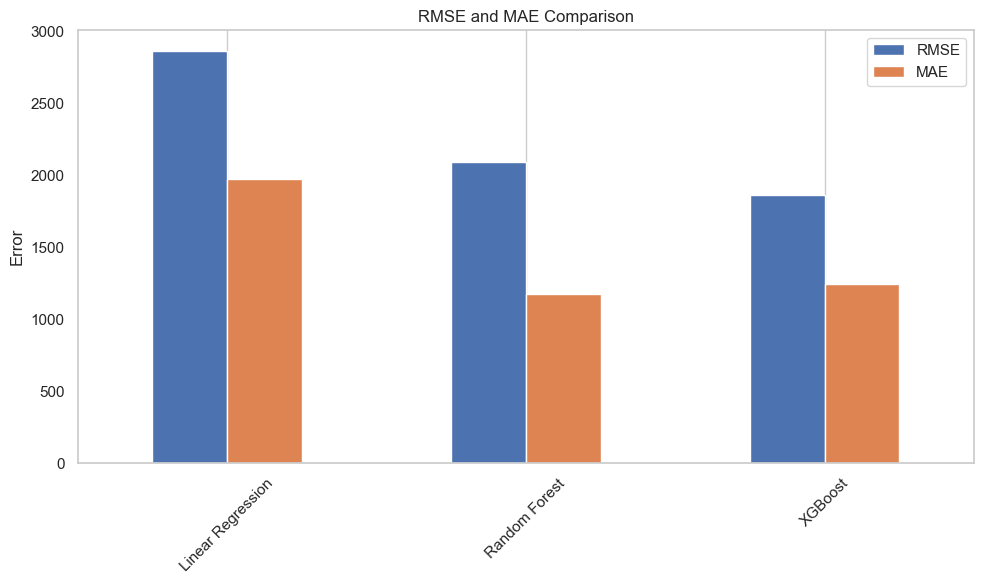

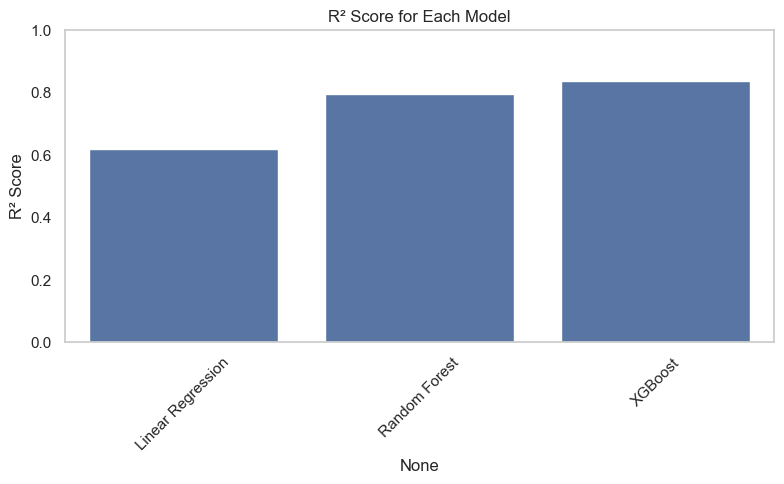

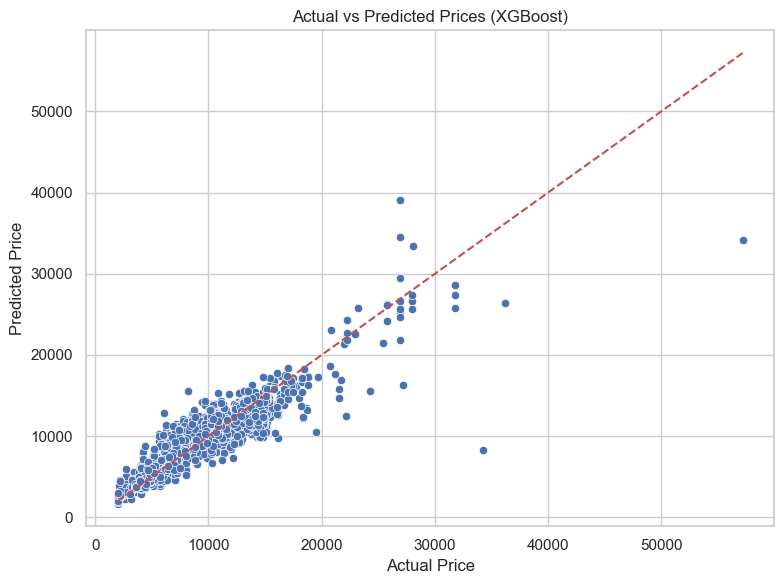

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize results storage
results = {}

# Evaluate models again for comparison
for name, model in models.items():
    preds = model.predict(X_test)
    results[name] = {
        'RMSE': mean_squared_error(y_test, preds, squared=False),
        'MAE': mean_absolute_error(y_test, preds),
        'R2 Score': r2_score(y_test, preds),
        'Predictions': preds
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\n📋 Model Comparison:")
print(results_df[['RMSE', 'MAE', 'R2 Score']])

# -----------------------------
# 📊 Plot 1: Bar chart comparison
# -----------------------------
plt.figure(figsize=(12, 6))
results_df[['RMSE', 'MAE']].plot(kind='bar', figsize=(10, 6))
plt.title('RMSE and MAE Comparison')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# -----------------------------
# 📊 Plot 2: R² Scores
# -----------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y='R2 Score', data=results_df.reset_index())
plt.title("R² Score for Each Model")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# -----------------------------
# 📊 Plot 3: Actual vs Predicted for best model
# -----------------------------
best_model_name = results_df['RMSE'].idxmin()
best_preds = results[best_model_name]['Predictions']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_preds)
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.tight_layout()
plt.show()

In [21]:
pip install mlflow


Note: you may need to restart the kernel to use updated packages.


In [29]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Start MLflow experiment
with mlflow.start_run():

    # List of models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "XGBoost": xgb.XGBRegressor()
    }

    for name, model in models.items():
        print(f"Training {name}...")
        
        # Start a new nested run for each model
        with mlflow.start_run(nested=True):
            # Train the model
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Compute metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)

            # Log metrics and parameters to MLflow
            mlflow.log_param("model_name", name)  # Log model name
            mlflow.log_metric("mae", mae)  # Log MAE
            mlflow.log_metric("mse", mse)  # Log MSE
            mlflow.log_metric("rmse", rmse)  # Log RMSE
            mlflow.log_metric("r2", r2)  # Log R2

            # Log the trained model to MLflow
            mlflow.sklearn.log_model(model, f"{name}_model")

            print(f"{name} MAE: {mae:.4f}")
            print(f"{name} MSE: {mse:.4f}")
            print(f"{name} RMSE: {rmse:.4f}")
            print(f"{name} R-squared: {r2:.4f}")
            print("-" * 50)

# To check your models and metrics, run MLflow UI in the terminal
# mlflow ui

Training Linear Regression...


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2025/04/16 18:37:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression MAE: 1972.9373
Linear Regression MSE: 8202327.5574
Linear Regression RMSE: 2863.9706
Linear Regression R-squared: 0.6196
--------------------------------------------------
Training Random Forest...


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2025/04/16 18:37:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest MAE: 1178.8052
Random Forest MSE: 4377857.5255
Random Forest RMSE: 2092.3330
Random Forest R-squared: 0.7970
--------------------------------------------------
Training XGBoost...


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2025/04/16 18:37:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost MAE: 1126.7001
XGBoost MSE: 3321347.0472
XGBoost RMSE: 1822.4563
XGBoost R-squared: 0.8460
--------------------------------------------------


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming your X_train and y_train are already prepared and cleaned

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Train XGBoost
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Now save the trained models
import joblib
joblib.dump(linear_model, 'Linear Regression.pkl')
joblib.dump(random_forest_model, 'Random Forest.pkl')
joblib.dump(xgboost_model, 'XGBoost.pkl')

['XGBoost.pkl']

In [65]:
import joblib

# Load the models
linear_model = joblib.load('Linear Regression.pkl')
random_forest_model = joblib.load('Random Forest.pkl')
xgboost_model = joblib.load('XGBoost.pkl')

In [69]:
import joblib
import os

# Create the directory if it doesn't exist
save_path = 'C:/Users/ratnakar/Downloads/flight_price_models'
os.makedirs(save_path, exist_ok=True)

# Save each model
joblib.dump(linear_model, os.path.join(save_path, 'Linear Regression.pkl'))
joblib.dump(random_forest_model, os.path.join(save_path, 'Random Forest.pkl'))
joblib.dump(xgboost_model, os.path.join(save_path, 'XGBoost.pkl'))

linear_model = joblib.load('C:/Users/ratnakar/Downloads/flight_price_models/Linear Regression.pkl')
random_forest_model = joblib.load('C:/Users/ratnakar/Downloads/flight_price_models/Random Forest.pkl')
xgboost_model = joblib.load('C:/Users/ratnakar/Downloads/flight_price_models/XGBoost.pkl')

In [79]:
print(flight_data.columns)

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [1]:
pip install streamlit

In [7]:
pip install streamlit ipykernel

In [9]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime

# Load the processed flight data
flight_data = pd.read_csv('processed_flight_data.csv')

# Load the models (Linear Regression, Random Forest, XGBoost)
linear_model = joblib.load('C:/Users/ratnakar/Downloads/flight_price_models/Linear Regression.pkl')
random_forest_model = joblib.load('C:/Users/ratnakar/Downloads/flight_price_models/Random Forest.pkl')
xgboost_model = joblib.load('C:/Users/ratnakar/Downloads/flight_price_models/XGBoost.pkl')

# Streamlit UI
st.title("✈️ Flight Price Prediction App")

# Sidebar Filters
st.sidebar.header("🔎 Filter Flights")
source_filter = st.sidebar.selectbox("Source", sorted([col.replace('Source_', '') for col in flight_data.columns if col.startswith('Source_')]))
destination_filter = st.sidebar.selectbox("Destination", sorted([col.replace('Destination_', '') for col in flight_data.columns if col.startswith('Destination_')]))
airline_filter = st.sidebar.selectbox("Airline", sorted([col.replace('Airline_', '') for col in flight_data.columns if col.startswith('Airline_')]))

# Create filtered data mask
source_col = f"Source_{source_filter}"
dest_col = f"Destination_{destination_filter}"
airline_col = f"Airline_{airline_filter}"

filter_mask = (
    (flight_data[source_col] == 1) &
    (flight_data[dest_col] == 1) &
    (flight_data[airline_col] == 1)
)

filtered_data = flight_data[filter_mask]

# Display filtered data
st.write(f"📋 Filtered Data — Source: {source_filter}, Destination: {destination_filter}, Airline: {airline_filter}")
st.dataframe(filtered_data)

# Visualizations
st.header("📈 Flight Price Trends")
if not filtered_data.empty:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=filtered_data, x=airline_col, y="Price", ax=ax)
    ax.set_title("Flight Price Distribution")
    st.pyplot(fig)
else:
    st.info("No data available for the selected filters.")

# Prediction Section
st.header("🧮 Predict Flight Price")

# User input for prediction
departure_date = st.date_input("Departure Date", min_value=datetime.today())
departure_time = st.time_input("Departure Time", value=datetime(2023, 1, 1, 12, 0).time())
journey_day = departure_date.day
journey_month = departure_date.month
dep_hour = departure_time.hour
dep_minute = departure_time.minute

# Duration input
duration_hours = st.number_input("Flight Duration (Hours)", min_value=0, max_value=24, value=2)
duration_minutes = st.number_input("Flight Duration (Minutes)", min_value=0, max_value=59, value=30)

# Stops
total_stops = st.selectbox("Total Stops", [0, 1, 2, 3, 4])

# Build input features
input_features = {
    'Total_Stops': total_stops,
    'Journey_Day': journey_day,
    'Journey_Month': journey_month,
    'Dep_Hour': dep_hour,
    'Dep_Minute': dep_minute,
    'Arrival_Hour': (dep_hour + duration_hours) % 24,
    'Arrival_Minute': (dep_minute + duration_minutes) % 60,
    'Duration_hours': duration_hours,
    'Duration_minutes': duration_minutes
}

# Initialize all airline, source, destination one-hot encoded columns as 0
for col in flight_data.columns:
    if col.startswith('Airline_') or col.startswith('Source_') or col.startswith('Destination_'):
        input_features[col] = 0

# Set selected options to 1
input_features[f'Airline_{airline_filter}'] = 1
input_features[f'Source_{source_filter}'] = 1
input_features[f'Destination_{destination_filter}'] = 1

# Convert to DataFrame
input_vector = pd.DataFrame([input_features])

# Drop 'Price' if accidentally included
if 'Price' in input_vector.columns:
    input_vector.drop(columns=['Price'], inplace=True)

# Select model
model_choice = st.selectbox("Select Model", ["Linear Regression", "Random Forest", "XGBoost"])
if model_choice == "Linear Regression":
    model = linear_model
elif model_choice == "Random Forest":
    model = random_forest_model
else:
    model = xgboost_model

# Predict and show result
if st.button("Predict Price"):
    try:
        predicted_price = model.predict(input_vector)[0]
        st.success(f"✈️ Estimated Flight Price: ₹{predicted_price:.2f}")
    except Exception as e:
        st.error(f"Prediction failed: {e}")

# Note: Run this file using: streamlit run flight_price_prediction_app.py

2025-04-26 16:48:32.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 16:48:32.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 16:48:32.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 16:48:32.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 16:48:32.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 16:48:32.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 16:48:32.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-26 16:48:32.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar